## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9774833	total: 70.1ms	remaining: 1m 10s
1:	learn: 0.9576200	total: 71.3ms	remaining: 35.6s
2:	learn: 0.9376674	total: 72.4ms	remaining: 24.1s
3:	learn: 0.9236518	total: 73.6ms	remaining: 18.3s
4:	learn: 0.9067084	total: 74.7ms	remaining: 14.9s
5:	learn: 0.8932820	total: 75.8ms	remaining: 12.5s
6:	learn: 0.8777116	total: 76.8ms	remaining: 10.9s
7:	learn: 0.8615005	total: 77.8ms	remaining: 9.65s
8:	learn: 0.8455168	total: 79ms	remaining: 8.69s
9:	learn: 0.8296404	total: 80ms	remaining: 7.92s
10:	learn: 0.8158022	total: 81ms	remaining: 7.28s
11:	learn: 0.8023968	total: 81.9ms	remaining: 6.75s
12:	learn: 0.7885385	total: 82.9ms	remaining: 6.3s
13:	learn: 0.7743884	total: 83.8ms	remaining: 5.91s
14:	learn: 0.7612220	total: 84.9ms	remaining: 5.57s
15:	learn: 0.7479750	total: 85.9ms	remaining: 5.28s
16:	learn: 0.7350304	total: 86.8ms	remaining: 5.02s
17:	learn: 0.7222950	total: 87.6ms	remaining: 4.78s
18:	learn: 0.7103547	total: 88.5ms	remaining: 4.57

40:	learn: 0.5187743	total: 108ms	remaining: 2.53s
41:	learn: 0.5117527	total: 109ms	remaining: 2.49s
42:	learn: 0.5064622	total: 110ms	remaining: 2.45s
43:	learn: 0.5007865	total: 111ms	remaining: 2.41s
44:	learn: 0.4949127	total: 112ms	remaining: 2.37s
45:	learn: 0.4882001	total: 113ms	remaining: 2.34s
46:	learn: 0.4828637	total: 114ms	remaining: 2.32s
47:	learn: 0.4780095	total: 115ms	remaining: 2.29s
48:	learn: 0.4726160	total: 116ms	remaining: 2.25s
49:	learn: 0.4676850	total: 117ms	remaining: 2.22s
50:	learn: 0.4619957	total: 118ms	remaining: 2.19s
51:	learn: 0.4580490	total: 118ms	remaining: 2.16s
52:	learn: 0.4537270	total: 119ms	remaining: 2.13s
53:	learn: 0.4496567	total: 120ms	remaining: 2.1s
54:	learn: 0.4456087	total: 121ms	remaining: 2.08s
55:	learn: 0.4418311	total: 122ms	remaining: 2.05s
56:	learn: 0.4383171	total: 123ms	remaining: 2.03s
57:	learn: 0.4332340	total: 123ms	remaining: 2s
58:	learn: 0.4291905	total: 124ms	remaining: 1.98s
59:	learn: 0.4256003	total: 125ms	r

135:	learn: 0.2707127	total: 193ms	remaining: 1.22s
136:	learn: 0.2696402	total: 194ms	remaining: 1.22s
137:	learn: 0.2685890	total: 195ms	remaining: 1.22s
138:	learn: 0.2675951	total: 195ms	remaining: 1.21s
139:	learn: 0.2667244	total: 196ms	remaining: 1.21s
140:	learn: 0.2656920	total: 197ms	remaining: 1.2s
141:	learn: 0.2648846	total: 198ms	remaining: 1.2s
142:	learn: 0.2638889	total: 199ms	remaining: 1.19s
143:	learn: 0.2632246	total: 200ms	remaining: 1.19s
144:	learn: 0.2620809	total: 201ms	remaining: 1.18s
145:	learn: 0.2610691	total: 201ms	remaining: 1.18s
146:	learn: 0.2602578	total: 202ms	remaining: 1.17s
147:	learn: 0.2591918	total: 203ms	remaining: 1.17s
148:	learn: 0.2581177	total: 204ms	remaining: 1.17s
149:	learn: 0.2573990	total: 205ms	remaining: 1.16s
150:	learn: 0.2568268	total: 206ms	remaining: 1.16s
151:	learn: 0.2560982	total: 207ms	remaining: 1.15s
152:	learn: 0.2551977	total: 208ms	remaining: 1.15s
153:	learn: 0.2539627	total: 209ms	remaining: 1.15s
154:	learn: 0.

253:	learn: 0.1929674	total: 299ms	remaining: 879ms
254:	learn: 0.1925725	total: 300ms	remaining: 877ms
255:	learn: 0.1922887	total: 301ms	remaining: 875ms
256:	learn: 0.1918223	total: 302ms	remaining: 873ms
257:	learn: 0.1913041	total: 303ms	remaining: 871ms
258:	learn: 0.1909510	total: 304ms	remaining: 869ms
259:	learn: 0.1904363	total: 305ms	remaining: 867ms
260:	learn: 0.1899119	total: 305ms	remaining: 864ms
261:	learn: 0.1896003	total: 306ms	remaining: 863ms
262:	learn: 0.1891643	total: 307ms	remaining: 861ms
263:	learn: 0.1884821	total: 308ms	remaining: 859ms
264:	learn: 0.1879916	total: 309ms	remaining: 857ms
265:	learn: 0.1875785	total: 310ms	remaining: 855ms
266:	learn: 0.1872549	total: 311ms	remaining: 853ms
267:	learn: 0.1867924	total: 312ms	remaining: 852ms
268:	learn: 0.1865773	total: 313ms	remaining: 850ms
269:	learn: 0.1860751	total: 314ms	remaining: 848ms
270:	learn: 0.1855658	total: 315ms	remaining: 846ms
271:	learn: 0.1852024	total: 316ms	remaining: 845ms
272:	learn: 

347:	learn: 0.1575639	total: 384ms	remaining: 720ms
348:	learn: 0.1570617	total: 385ms	remaining: 718ms
349:	learn: 0.1567666	total: 386ms	remaining: 716ms
350:	learn: 0.1564650	total: 387ms	remaining: 715ms
351:	learn: 0.1560683	total: 387ms	remaining: 713ms
352:	learn: 0.1558361	total: 388ms	remaining: 712ms
353:	learn: 0.1555599	total: 389ms	remaining: 710ms
354:	learn: 0.1552551	total: 390ms	remaining: 709ms
355:	learn: 0.1549796	total: 391ms	remaining: 707ms
356:	learn: 0.1544588	total: 392ms	remaining: 706ms
357:	learn: 0.1543235	total: 393ms	remaining: 704ms
358:	learn: 0.1537595	total: 394ms	remaining: 703ms
359:	learn: 0.1535001	total: 395ms	remaining: 701ms
360:	learn: 0.1530871	total: 395ms	remaining: 700ms
361:	learn: 0.1527343	total: 396ms	remaining: 698ms
362:	learn: 0.1523272	total: 397ms	remaining: 697ms
363:	learn: 0.1518871	total: 398ms	remaining: 695ms
364:	learn: 0.1516577	total: 399ms	remaining: 694ms
365:	learn: 0.1513750	total: 400ms	remaining: 693ms
366:	learn: 

463:	learn: 0.1230668	total: 491ms	remaining: 567ms
464:	learn: 0.1228363	total: 492ms	remaining: 566ms
465:	learn: 0.1226504	total: 492ms	remaining: 564ms
466:	learn: 0.1224161	total: 494ms	remaining: 564ms
467:	learn: 0.1221052	total: 495ms	remaining: 562ms
468:	learn: 0.1217944	total: 496ms	remaining: 561ms
469:	learn: 0.1216465	total: 497ms	remaining: 560ms
470:	learn: 0.1214982	total: 498ms	remaining: 559ms
471:	learn: 0.1211607	total: 498ms	remaining: 558ms
472:	learn: 0.1210873	total: 500ms	remaining: 557ms
473:	learn: 0.1209473	total: 501ms	remaining: 556ms
474:	learn: 0.1207569	total: 501ms	remaining: 554ms
475:	learn: 0.1205280	total: 502ms	remaining: 553ms
476:	learn: 0.1203533	total: 503ms	remaining: 551ms
477:	learn: 0.1202344	total: 504ms	remaining: 550ms
478:	learn: 0.1201578	total: 504ms	remaining: 549ms
479:	learn: 0.1200197	total: 505ms	remaining: 547ms
480:	learn: 0.1198228	total: 506ms	remaining: 546ms
481:	learn: 0.1196198	total: 507ms	remaining: 544ms
482:	learn: 

554:	learn: 0.1058940	total: 575ms	remaining: 461ms
555:	learn: 0.1057293	total: 576ms	remaining: 460ms
556:	learn: 0.1055731	total: 577ms	remaining: 459ms
557:	learn: 0.1052361	total: 578ms	remaining: 458ms
558:	learn: 0.1050520	total: 579ms	remaining: 457ms
559:	learn: 0.1048815	total: 580ms	remaining: 455ms
560:	learn: 0.1048508	total: 580ms	remaining: 454ms
561:	learn: 0.1047222	total: 581ms	remaining: 453ms
562:	learn: 0.1046030	total: 582ms	remaining: 452ms
563:	learn: 0.1044341	total: 583ms	remaining: 451ms
564:	learn: 0.1043418	total: 584ms	remaining: 449ms
565:	learn: 0.1041996	total: 585ms	remaining: 448ms
566:	learn: 0.1040494	total: 586ms	remaining: 447ms
567:	learn: 0.1040261	total: 587ms	remaining: 446ms
568:	learn: 0.1038035	total: 587ms	remaining: 445ms
569:	learn: 0.1036736	total: 588ms	remaining: 444ms
570:	learn: 0.1036127	total: 589ms	remaining: 443ms
571:	learn: 0.1035171	total: 590ms	remaining: 441ms
572:	learn: 0.1033009	total: 592ms	remaining: 441ms
573:	learn: 

663:	learn: 0.0906324	total: 684ms	remaining: 346ms
664:	learn: 0.0904265	total: 686ms	remaining: 345ms
665:	learn: 0.0902448	total: 687ms	remaining: 344ms
666:	learn: 0.0901017	total: 688ms	remaining: 344ms
667:	learn: 0.0900656	total: 690ms	remaining: 343ms
668:	learn: 0.0899603	total: 691ms	remaining: 342ms
669:	learn: 0.0897289	total: 693ms	remaining: 341ms
670:	learn: 0.0895085	total: 694ms	remaining: 340ms
671:	learn: 0.0893639	total: 694ms	remaining: 339ms
672:	learn: 0.0892458	total: 695ms	remaining: 338ms
673:	learn: 0.0890531	total: 696ms	remaining: 337ms
674:	learn: 0.0888726	total: 697ms	remaining: 336ms
675:	learn: 0.0886622	total: 698ms	remaining: 334ms
676:	learn: 0.0885075	total: 699ms	remaining: 333ms
677:	learn: 0.0884836	total: 700ms	remaining: 332ms
678:	learn: 0.0883636	total: 701ms	remaining: 331ms
679:	learn: 0.0881604	total: 702ms	remaining: 330ms
680:	learn: 0.0880284	total: 703ms	remaining: 329ms
681:	learn: 0.0878667	total: 704ms	remaining: 328ms
682:	learn: 

747:	learn: 0.0797724	total: 767ms	remaining: 258ms
748:	learn: 0.0796418	total: 768ms	remaining: 257ms
749:	learn: 0.0795469	total: 769ms	remaining: 256ms
750:	learn: 0.0794712	total: 770ms	remaining: 255ms
751:	learn: 0.0793031	total: 771ms	remaining: 254ms
752:	learn: 0.0791539	total: 772ms	remaining: 253ms
753:	learn: 0.0789668	total: 772ms	remaining: 252ms
754:	learn: 0.0788449	total: 774ms	remaining: 251ms
755:	learn: 0.0787291	total: 775ms	remaining: 250ms
756:	learn: 0.0786069	total: 776ms	remaining: 249ms
757:	learn: 0.0784654	total: 777ms	remaining: 248ms
758:	learn: 0.0782957	total: 777ms	remaining: 247ms
759:	learn: 0.0782800	total: 778ms	remaining: 246ms
760:	learn: 0.0781411	total: 779ms	remaining: 245ms
761:	learn: 0.0780893	total: 780ms	remaining: 244ms
762:	learn: 0.0779350	total: 781ms	remaining: 242ms
763:	learn: 0.0777568	total: 782ms	remaining: 241ms
764:	learn: 0.0776674	total: 782ms	remaining: 240ms
765:	learn: 0.0775716	total: 783ms	remaining: 239ms
766:	learn: 

869:	learn: 0.0673079	total: 875ms	remaining: 131ms
870:	learn: 0.0672487	total: 876ms	remaining: 130ms
871:	learn: 0.0672362	total: 877ms	remaining: 129ms
872:	learn: 0.0670897	total: 878ms	remaining: 128ms
873:	learn: 0.0670720	total: 879ms	remaining: 127ms
874:	learn: 0.0669746	total: 880ms	remaining: 126ms
875:	learn: 0.0668784	total: 881ms	remaining: 125ms
876:	learn: 0.0667714	total: 882ms	remaining: 124ms
877:	learn: 0.0666960	total: 883ms	remaining: 123ms
878:	learn: 0.0665517	total: 884ms	remaining: 122ms
879:	learn: 0.0664356	total: 885ms	remaining: 121ms
880:	learn: 0.0663656	total: 886ms	remaining: 120ms
881:	learn: 0.0662913	total: 886ms	remaining: 119ms
882:	learn: 0.0662647	total: 887ms	remaining: 118ms
883:	learn: 0.0661687	total: 888ms	remaining: 117ms
884:	learn: 0.0660374	total: 889ms	remaining: 116ms
885:	learn: 0.0659324	total: 890ms	remaining: 115ms
886:	learn: 0.0657968	total: 891ms	remaining: 114ms
887:	learn: 0.0657265	total: 892ms	remaining: 112ms
888:	learn: 

961:	learn: 0.0593138	total: 957ms	remaining: 37.8ms
962:	learn: 0.0592798	total: 959ms	remaining: 36.8ms
963:	learn: 0.0592099	total: 959ms	remaining: 35.8ms
964:	learn: 0.0591491	total: 960ms	remaining: 34.8ms
965:	learn: 0.0590436	total: 961ms	remaining: 33.8ms
966:	learn: 0.0589831	total: 962ms	remaining: 32.8ms
967:	learn: 0.0589446	total: 963ms	remaining: 31.8ms
968:	learn: 0.0588788	total: 964ms	remaining: 30.8ms
969:	learn: 0.0587700	total: 965ms	remaining: 29.8ms
970:	learn: 0.0586235	total: 966ms	remaining: 28.8ms
971:	learn: 0.0585536	total: 967ms	remaining: 27.8ms
972:	learn: 0.0584626	total: 968ms	remaining: 26.8ms
973:	learn: 0.0583983	total: 968ms	remaining: 25.8ms
974:	learn: 0.0583295	total: 969ms	remaining: 24.9ms
975:	learn: 0.0582576	total: 970ms	remaining: 23.9ms
976:	learn: 0.0581230	total: 971ms	remaining: 22.9ms
977:	learn: 0.0580434	total: 972ms	remaining: 21.9ms
978:	learn: 0.0579938	total: 973ms	remaining: 20.9ms
979:	learn: 0.0579188	total: 974ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

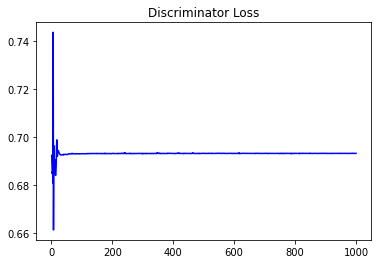

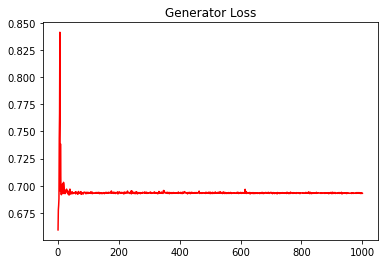

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08793729586903033


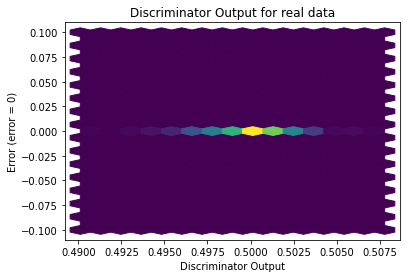

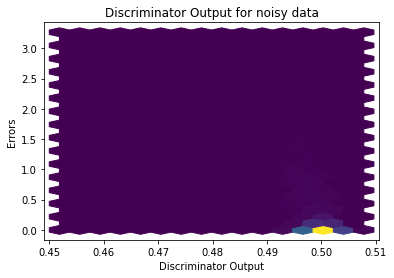

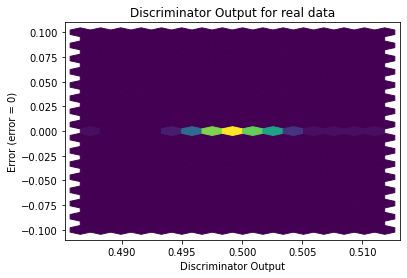

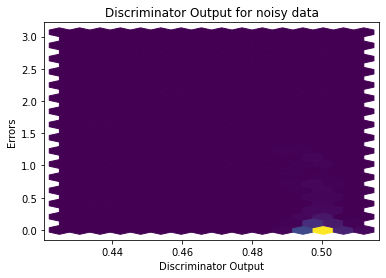

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


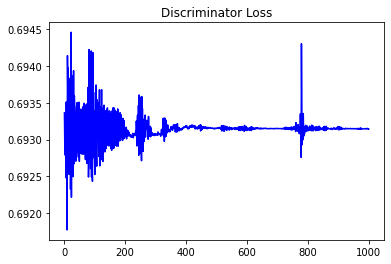

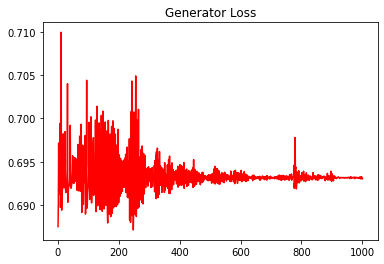

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09096201617687602


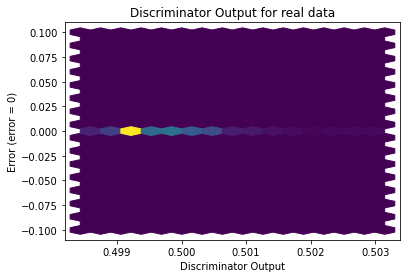

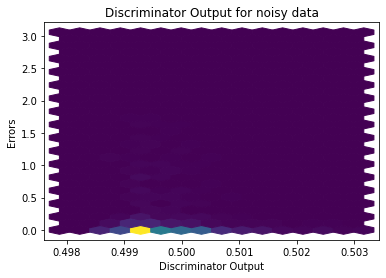

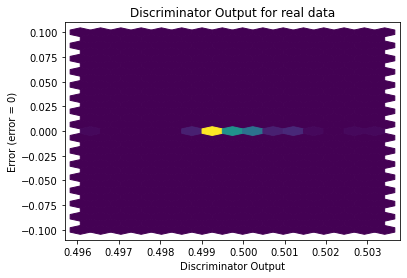

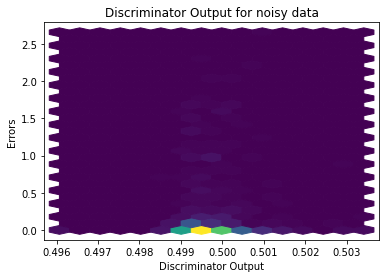

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0850]], requires_grad=True)
